<a href="https://colab.research.google.com/github/nabinkhanal128/Telco-Customer-Churn/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telco Customer Churn Prediction**

Churn Prediction using MLDLC(Machine Learning Development Life Cycle), The dataset used is from the given link [Telco-Customer-Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

## Data Gathering

Downloading Datasets form Kaggle

In [1]:
!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 70.7MB/s]


Unzipping the downloaded dataset

In [2]:
!unzip /content/telco-customer-churn.zip

Archive:  /content/telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


Importing the required Libraries

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

Reading the unzipped csv file

In [4]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

### Inspecting the Dataframe

In [5]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Data Preprocessing and Feature Engineering/Selection

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Checking the data form each columns so we can work individually in this given dataset.

In [8]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 50)

Column: customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
--------------------------------------------------
Column: gender
['Female' 'Male']
--------------------------------------------------
Column: SeniorCitizen
[0 1]
--------------------------------------------------
Column: Partner
['Yes' 'No']
--------------------------------------------------
Column: Dependents
['No' 'Yes']
--------------------------------------------------
Column: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
Column: PhoneService
['No' 'Yes']
--------------------------------------------------
Column: MultipleLines
['No phone service' 'No' 'Yes']
--------------------------------------------------
Column: InternetService
['DSL' 'Fiber o

Dropping Unnecessary column

In [9]:
df.drop(columns=['customerID'], inplace=True)

Checking to see if their is any null values and replacing the given null values with median of the data.

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].isnull().sum())

11


In [11]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

<ipython-input-11-64493bf53d4b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


Identifiying binary columns and replacing their values in terms of binary code.

In [12]:
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_columns:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})


In [13]:
internet_related = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in internet_related:
    df[col] = df[col].replace({'No internet service': 'No'}).map({'Yes': 1, 'No': 0})

In [14]:
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0})

In [15]:
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

Checking duplicated values and dropping such values.

In [16]:
df.duplicated().sum()

22

In [17]:
df.drop_duplicates()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,False,False,True,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,False,False,True,False,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,0,False,False,True,False,False,False,True
7039,0,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,0,True,False,True,False,True,False,False
7040,0,0,1,1,11,0,0,1,0,0,...,29.60,346.45,0,False,False,False,False,False,True,False
7041,1,1,1,0,4,1,1,0,0,0,...,74.40,306.60,1,True,False,False,False,False,False,True


In [18]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

Checking columns to remove for model evaluation, and training.

In [19]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 50)

Column: gender
[0 1]
--------------------------------------------------
Column: SeniorCitizen
[0 1]
--------------------------------------------------
Column: Partner
[1 0]
--------------------------------------------------
Column: Dependents
[0 1]
--------------------------------------------------
Column: tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
Column: PhoneService
[0 1]
--------------------------------------------------
Column: MultipleLines
[0 1]
--------------------------------------------------
Column: OnlineSecurity
[0 1]
--------------------------------------------------
Column: OnlineBackup
[1 0]
--------------------------------------------------
Column: DeviceProtection
[0 1]
--------------------------------------------------
Column: TechS

In [20]:
columns_to_remove = ['InternetService', 'Contract', 'PaymentMethod']
df = df.drop(columns=[col for col in columns_to_remove if col in df.columns], errors='ignore')

## EDA(Exploratory Data Analysis)

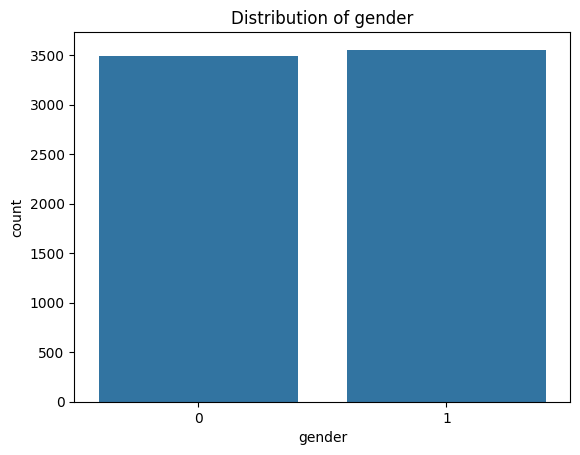

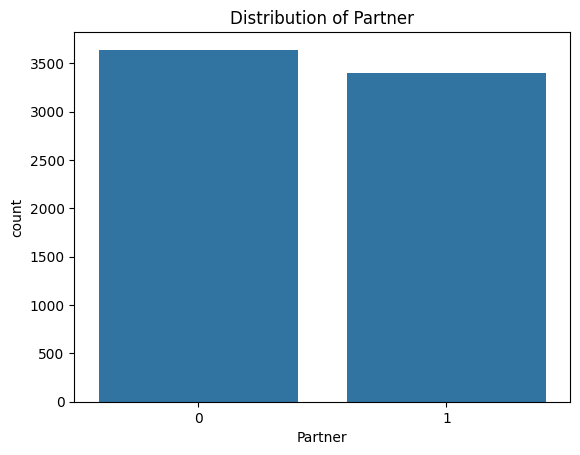

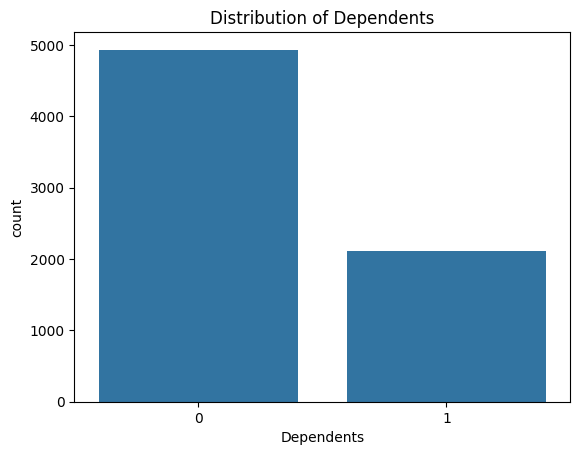

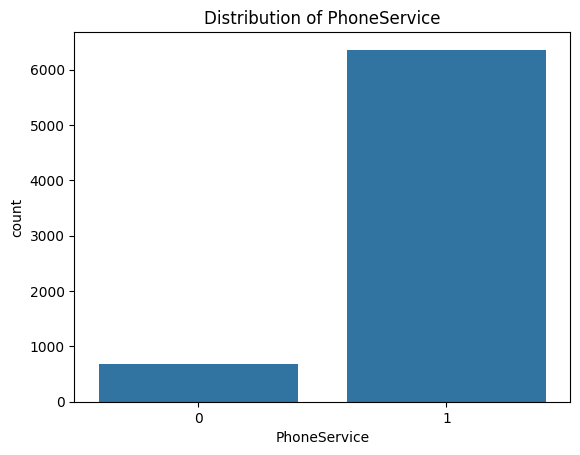

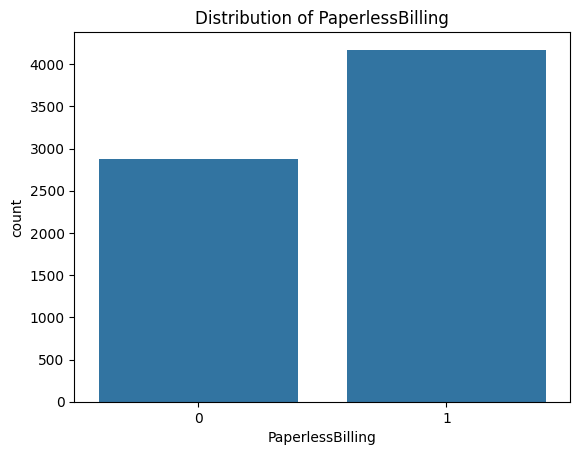

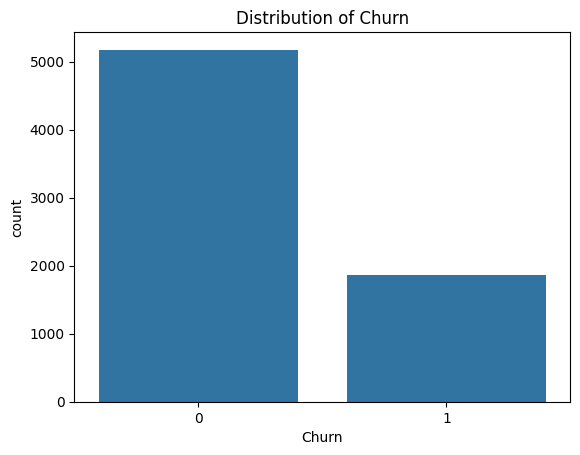

In [21]:
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in categorical_cols:
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.show()

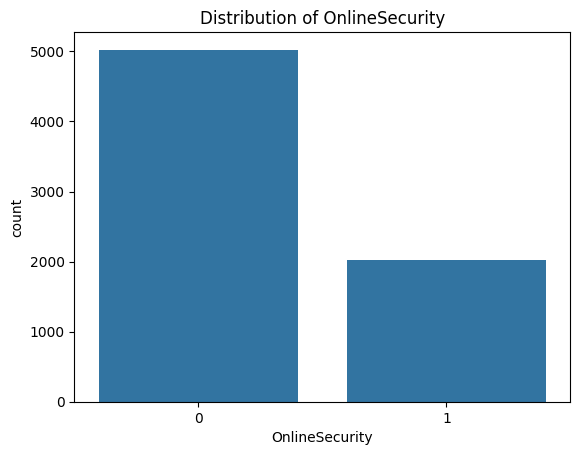

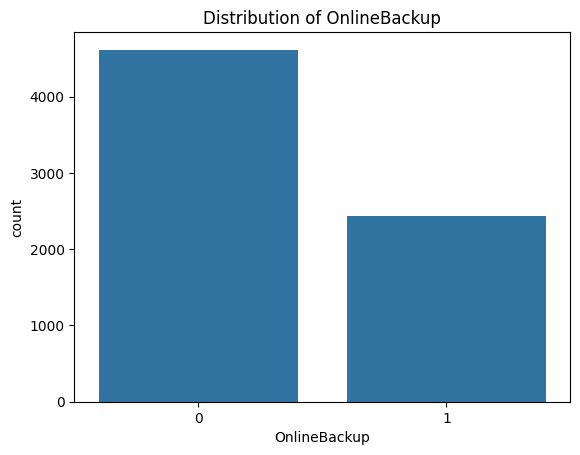

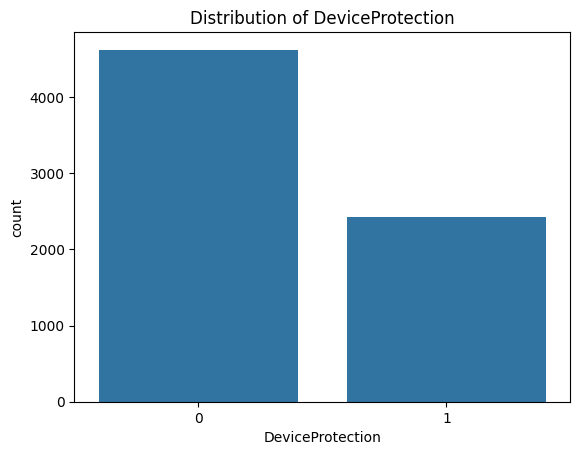

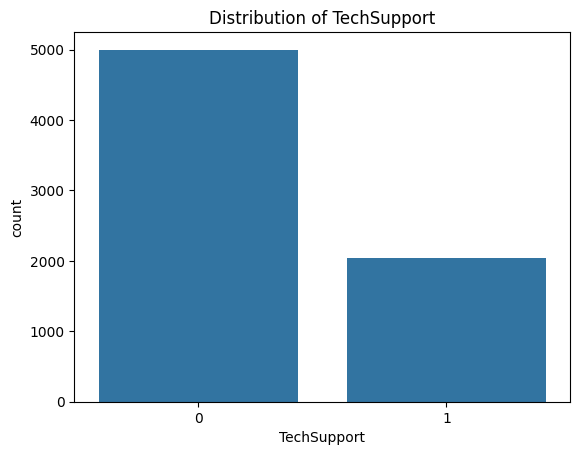

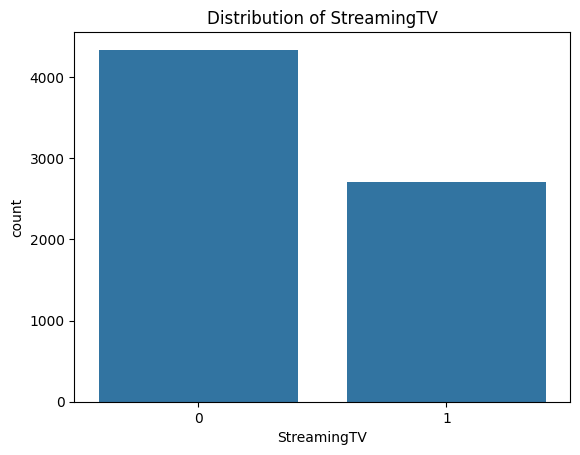

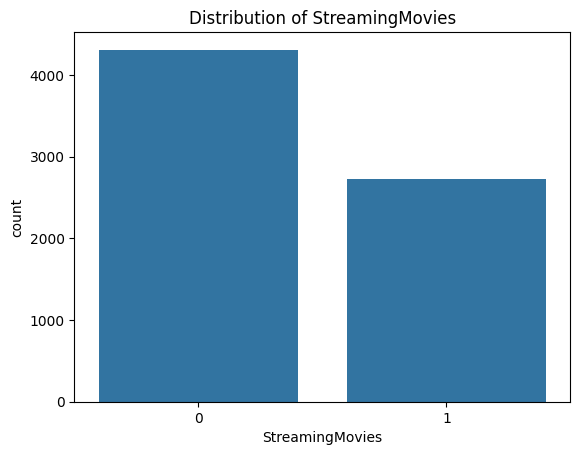

In [22]:
binary_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]
for col in binary_cols:
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.show()


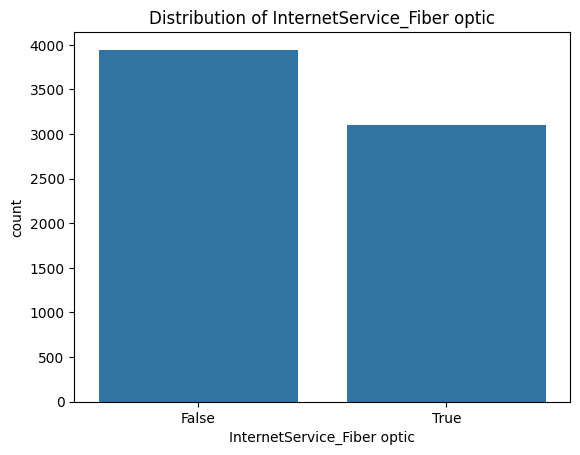

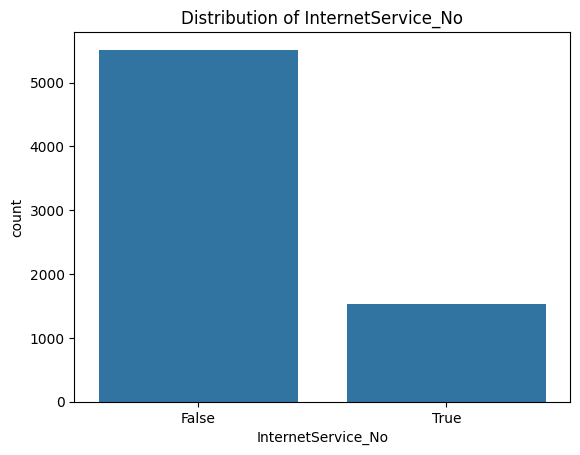

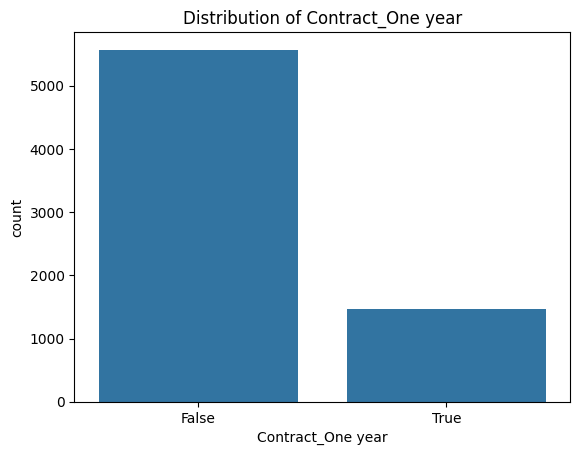

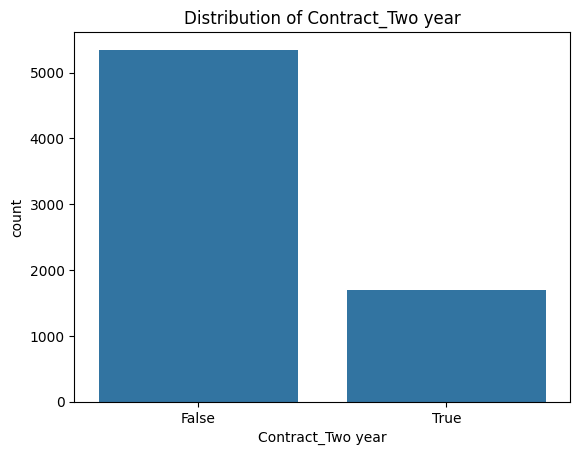

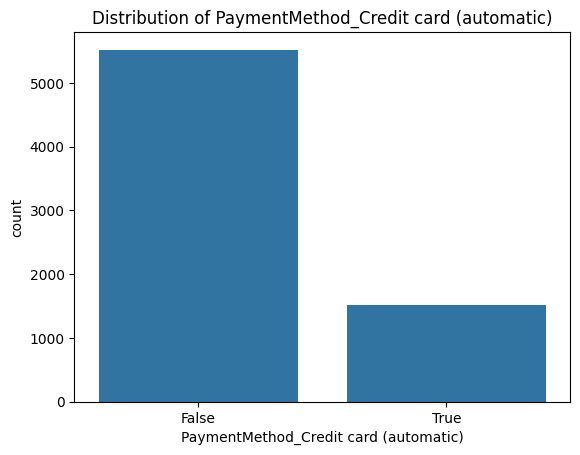

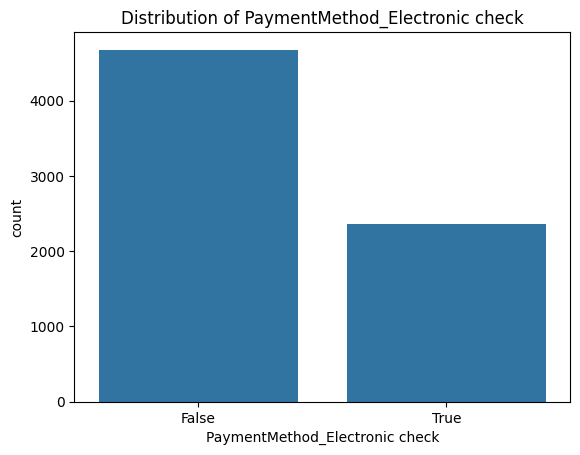

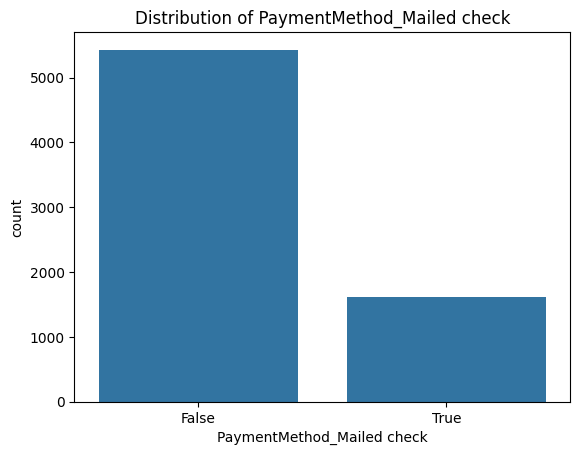

In [23]:
dummy_cols = [
    'InternetService_Fiber optic', 'InternetService_No',
    'Contract_One year', 'Contract_Two year',
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'
]
for col in dummy_cols:
    sns.countplot(data=df, x=col)
    plt.title(f"Distribution of {col}")
    plt.show()


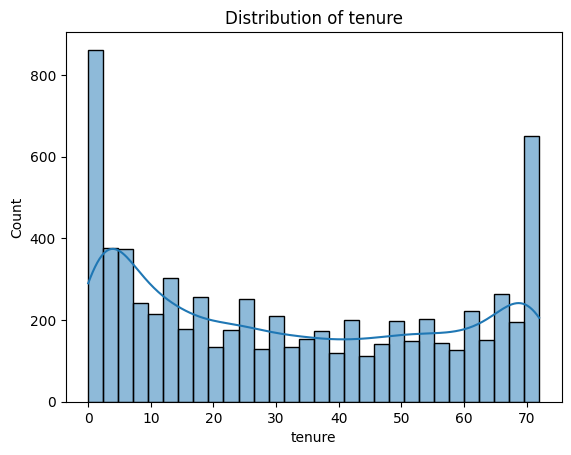

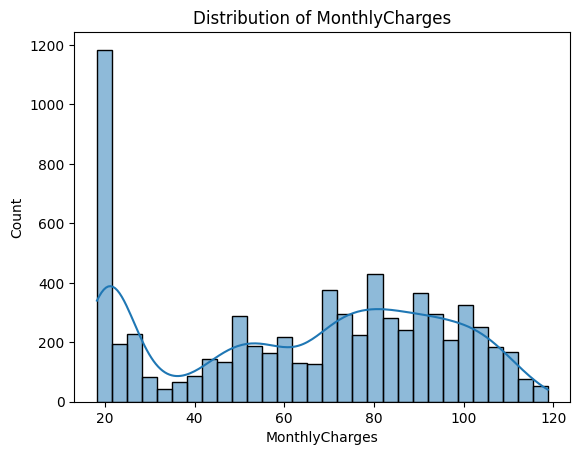

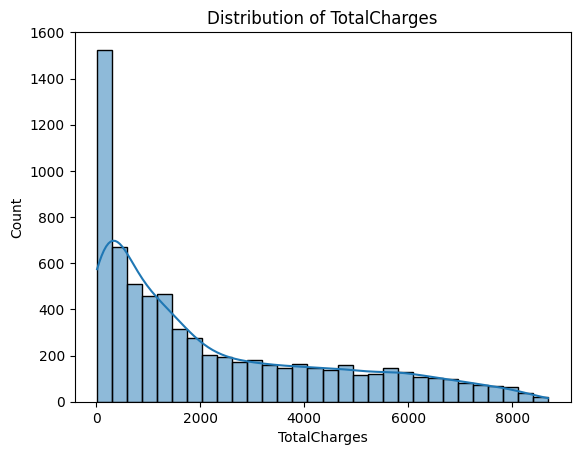

In [24]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerical_cols:
    sns.histplot(data=df, x=col, kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

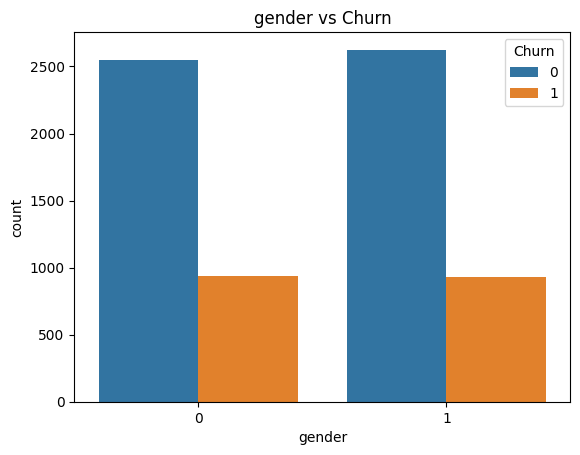

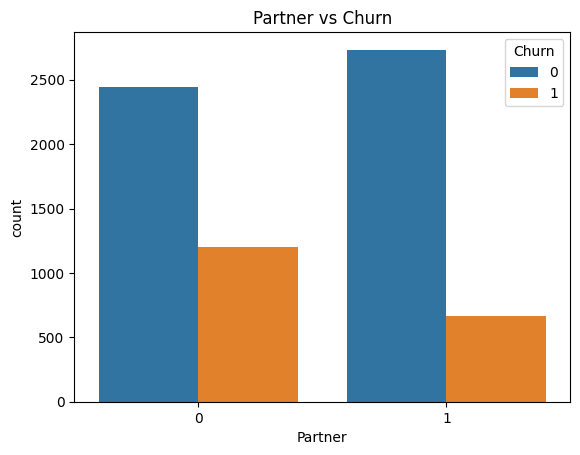

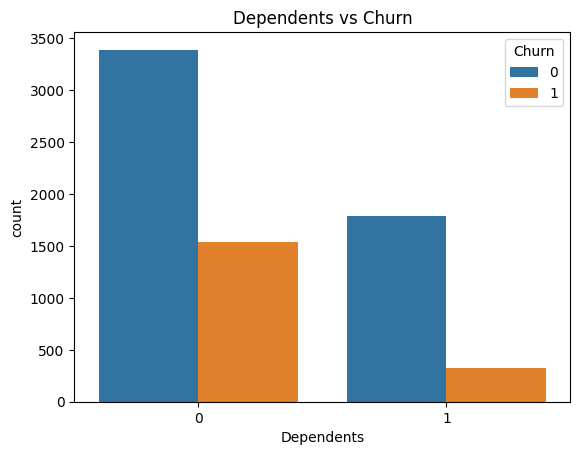

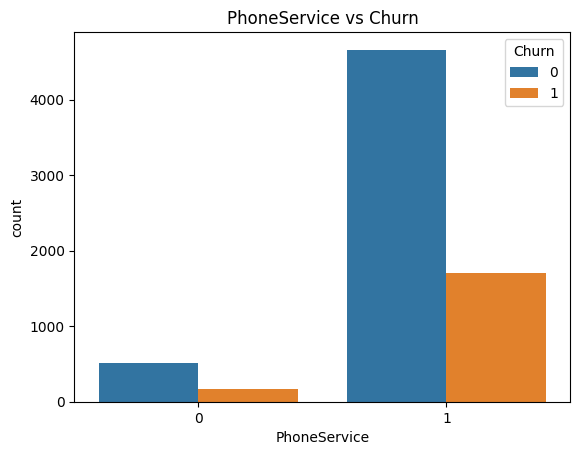

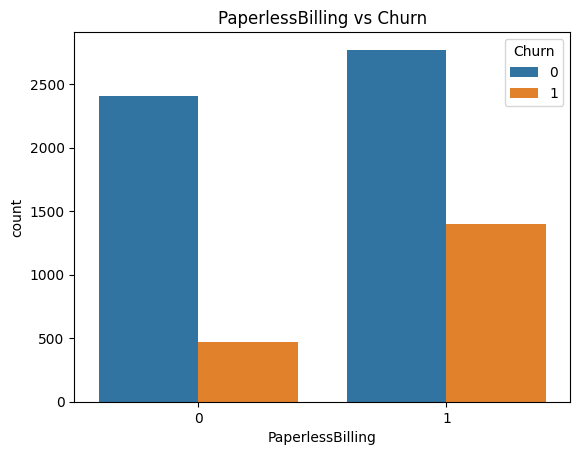

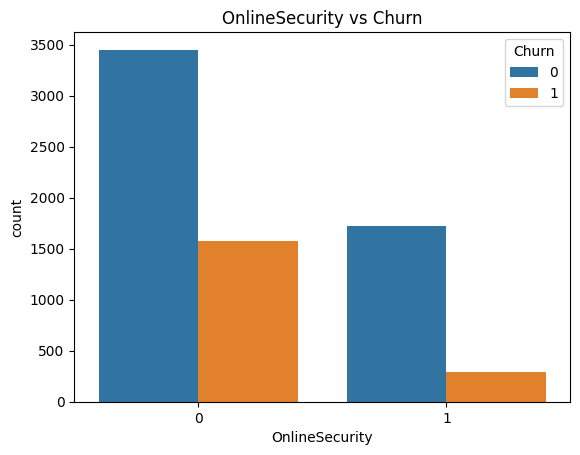

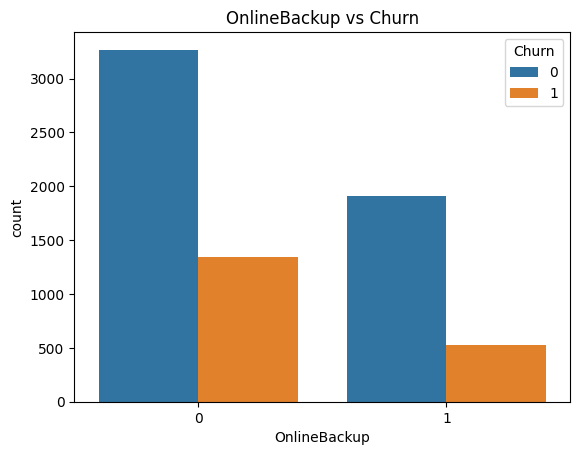

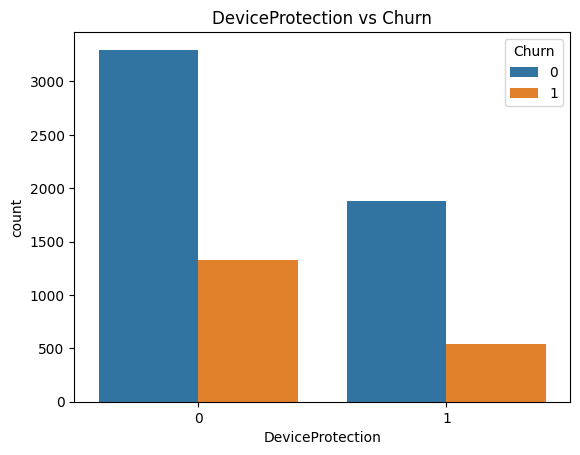

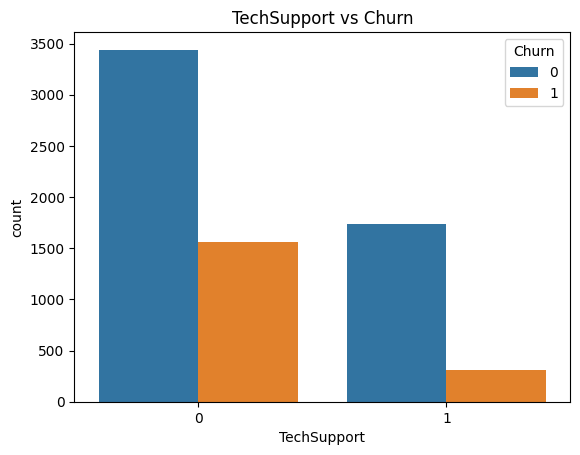

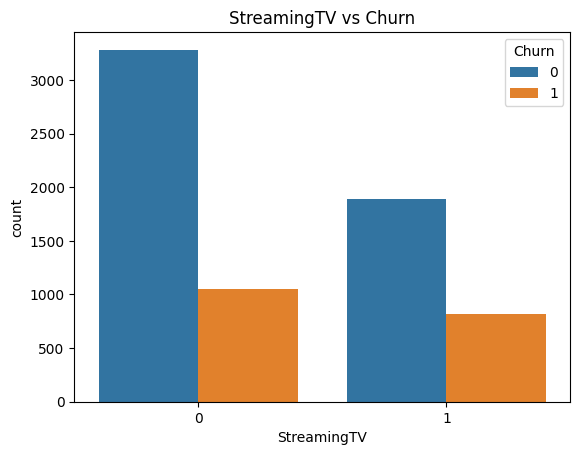

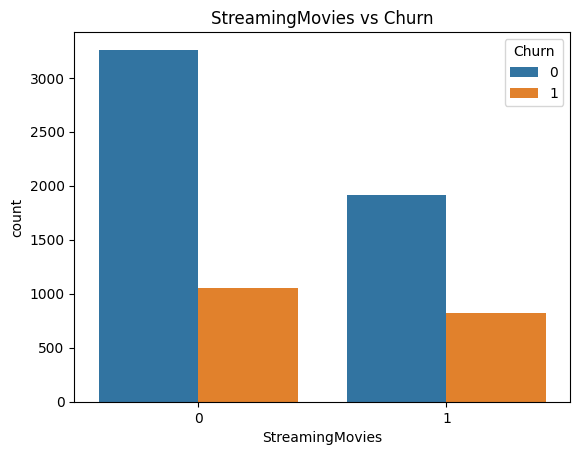

In [25]:
for col in categorical_cols + binary_cols:
    if col != 'Churn':
        sns.countplot(data=df, x=col, hue='Churn')
        plt.title(f"{col} vs Churn")
        plt.show()

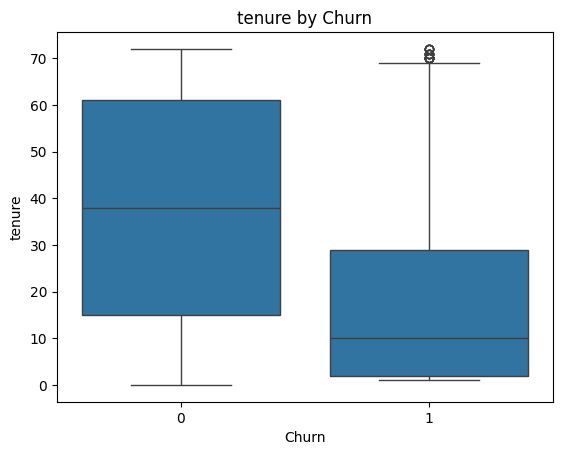

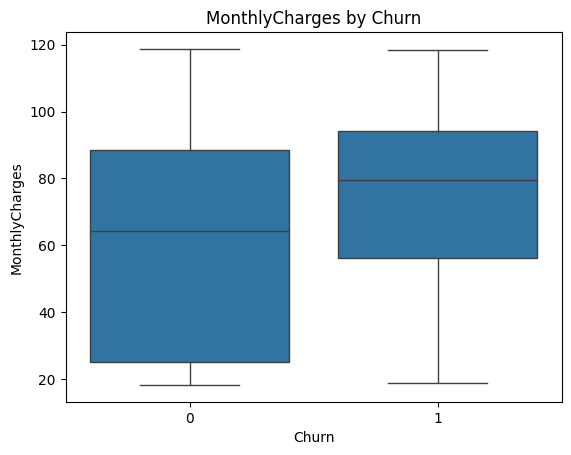

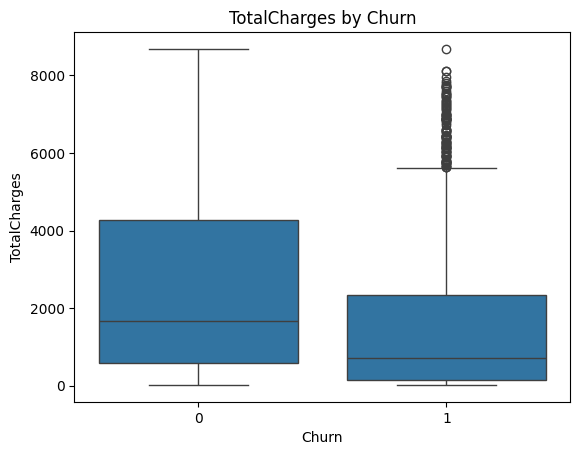

In [26]:
for col in numerical_cols:
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f"{col} by Churn")
    plt.show()

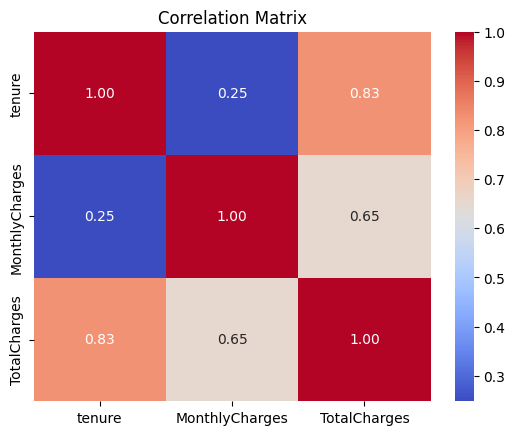

In [27]:
correlation = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

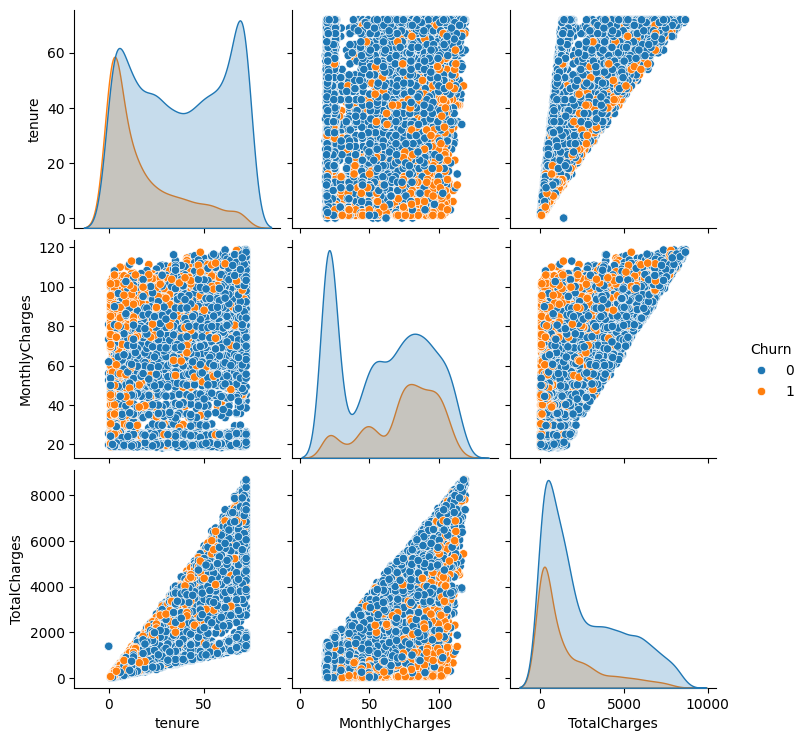

In [28]:
import seaborn as sns
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.show()

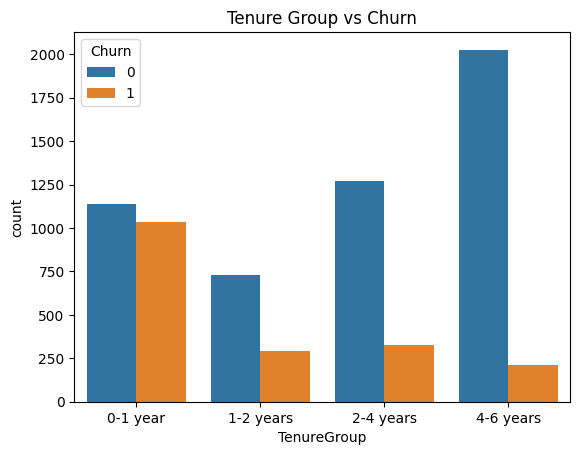

In [29]:
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], labels=['0-1 year', '1-2 years', '2-4 years', '4-6 years'])
sns.countplot(data=df, x='TenureGroup', hue='Churn')
plt.title("Tenure Group vs Churn")
plt.show()

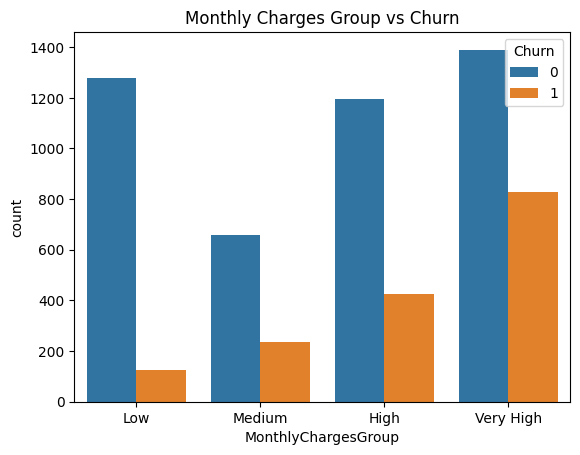

In [30]:
df['MonthlyChargesGroup'] = pd.cut(df['MonthlyCharges'], bins=[0, 25, 50, 75, 100], labels=['Low', 'Medium', 'High', 'Very High'])
sns.countplot(data=df, x='MonthlyChargesGroup', hue='Churn')
plt.title("Monthly Charges Group vs Churn")
plt.show()

Checking the distribution to stratify the y values in model training and evaluation.

In [31]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print(f"Churn Rate:\n{churn_rate}")

Churn Rate:
Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


## Model Training/Evaluation

In [32]:
X = df.drop(columns=['Churn','TenureGroup','MonthlyChargesGroup'])
y = df['Churn']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

In [34]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
}

In [35]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"--- {name} ---")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    if y_proba is not None:
        print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
    print("\n")

    results[name] = cross_val_score(model, X, y, cv=5, scoring='accuracy').mean()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409

Confusion Matrix:
[[922 113]
 [165 209]]
ROC-AUC Score: 0.8425327443230256




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

--- Decision Tree ---
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1035
           1       0.51      0.52      0.51       374

    accuracy                           0.74      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.74      0.74      0.74      1409

Confusion Matrix:
[[847 188]
 [181 193]]
ROC-AUC Score: 0.6667325428194993


--- Random Forest ---
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.65      0.50      0.56       374

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.80      0.79      1409

Confusion Matrix:
[[936  99]
 [188 186]]
ROC-AUC Score: 0.8299581492676121


--- Gradient Boosting ---
Classification Report:
              precision    recall  f1-score   support

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


--- KNN ---
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1035
           1       0.58      0.43      0.49       374

    accuracy                           0.76      1409
   macro avg       0.69      0.66      0.67      1409
weighted avg       0.75      0.76      0.75      1409

Confusion Matrix:
[[917 118]
 [214 160]]
ROC-AUC Score: 0.7541217804644915


--- Naive Bayes ---
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1035
           1       0.51      0.75      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.74      0.76      1409

Confusion Matrix:
[[767 268]
 [ 93 281]]
ROC-AUC Score: 0.8239272520602443




In [36]:
print("Model Comparison:")
for name, score in results.items():
    print(f"{name}: {score:.4f}")

Model Comparison:
Logistic Regression: 0.8038
Decision Tree: 0.7309
Random Forest: 0.7910
Gradient Boosting: 0.8062
SVM: 0.7346
KNN: 0.7626
Naive Bayes: 0.7497


<ipython-input-37-5bb74b7ff5af>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_scores, y=model_names, palette='viridis')


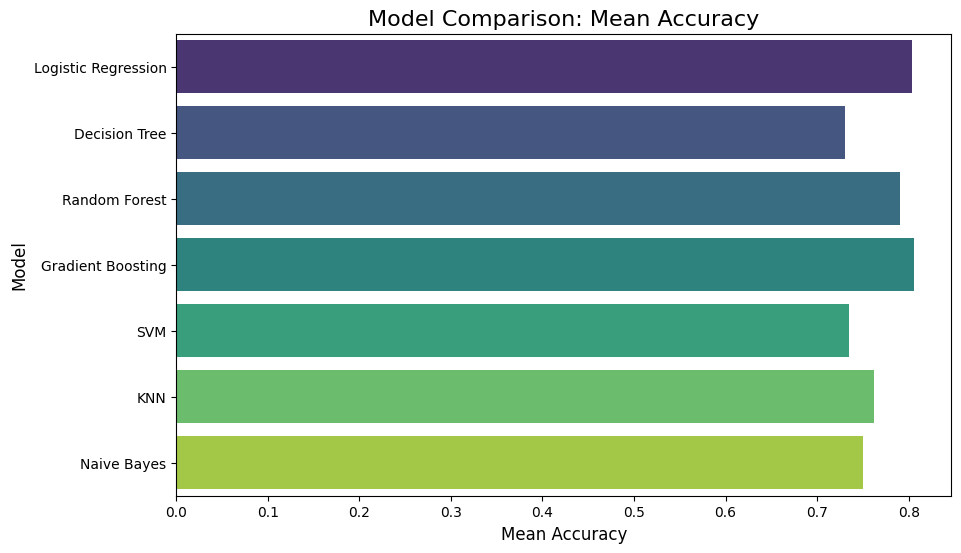

In [37]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(10, 6))
model_names = list(results.keys())
model_scores = list(results.values())
sns.barplot(x=model_scores, y=model_names, palette='viridis')
plt.title("Model Comparison: Mean Accuracy", fontsize=16)
plt.xlabel("Mean Accuracy", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.show()

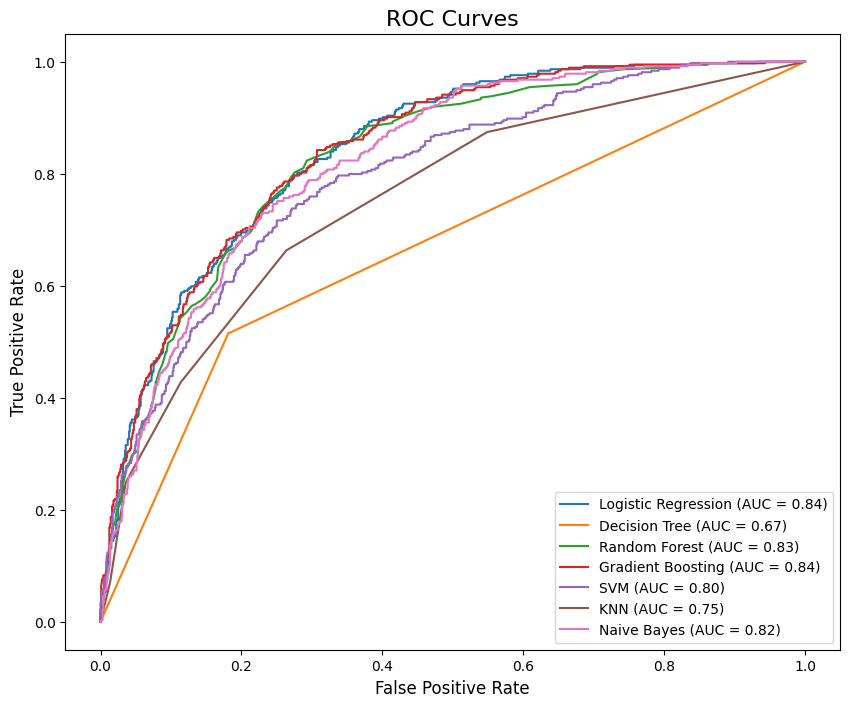

In [38]:
plt.figure(figsize=(10, 8))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title("ROC Curves", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right")
plt.show()

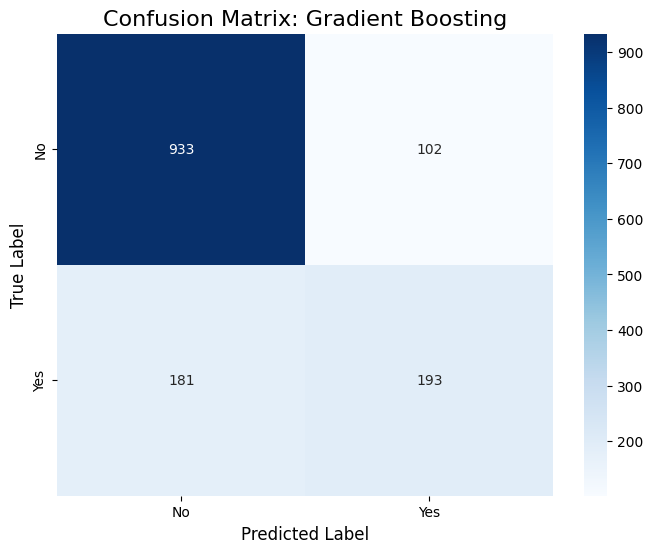

In [39]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title(f"Confusion Matrix: {best_model_name}", fontsize=16)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [41]:
rf_tuned = RandomForestClassifier(
    max_depth=10,
    min_samples_split=10,
    n_estimators=100,
    random_state=42
)

In [42]:
# Train the model
rf_tuned.fit(X_train, y_train)

# Predict on test data
y_pred = rf_tuned.predict(X_test)
y_proba = rf_tuned.predict_proba(X_test)[:, 1]

In [43]:
print("--- Random Forest (Tuned) ---")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

--- Random Forest (Tuned) ---
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Confusion Matrix:
[[937  98]
 [181 193]]
ROC-AUC Score: 0.8458459273037278


In [44]:
log_reg_tuned = LogisticRegression(max_iter=5000, random_state=42)

log_reg_tuned.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=42)

In [45]:
y_pred_lr = log_reg_tuned.predict(X_test)
y_proba_lr = log_reg_tuned.predict_proba(X_test)[:, 1]

In [46]:
print("--- Logistic Regression (Tuned) ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_lr))

--- Logistic Regression (Tuned) ---
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

Confusion Matrix:
[[927 108]
 [166 208]]
ROC-AUC Score: 0.842483660130719


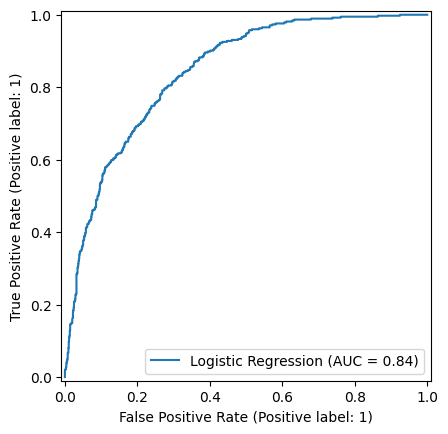

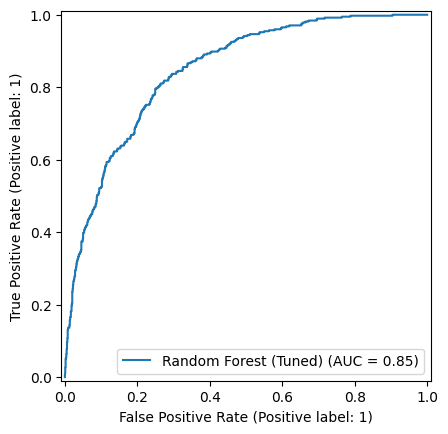

In [49]:
roc_display_lr = RocCurveDisplay.from_estimator(log_reg_tuned, X_test, y_test, name="Logistic Regression(Increase iterations)")

roc_display_rf = RocCurveDisplay.from_estimator(rf_tuned, X_test, y_test, name="Random Forest (Tuned)")

From the given findings of above model evaluation fined tuned Random forest performs better than other algorithms above and which have AUC of 0.85.